In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import numpy as np
driver = webdriver.Chrome('chromedriver')

In [ ]:
#create list
id_qna = []
qna = []
qna_time = []
id_ans = []
ans = []
id_user_ans = []
user_name_ans = []
ans_time = []
context_qna  = driver.find_elements(By.XPATH, "//div[@class='question js-question']")  #main html

for x in context_qna:

    id_qna.append(x.find_element(By.XPATH, "//div[@class='question js-question']").get_attribute("data-questionid"))

    qna.append(x.find_element(By.XPATH, '*//div[@class = "s-prose js-post-body"]').text)

    qna_time.append(x.find_element(By.XPATH, '*//div[@class = "post-signature owner flex--item"]//span[@title]').get_attribute("title"))


    try:

        a = x.find_element(By.XPATH, "//div[@class='answer js-answer accepted-answer js-accepted-answer']").get_attribute("data-answerid")
        if a != None:
            id_ans.append(a)

    except :

        id_ans.append(None)

    try:

        a = x.find_element(By.XPATH, '//div[@class = "answercell post-layout--right"]//div[@class = "s-prose js-post-body"]').text
        if a != None:
            ans.append(a)

    except :

        ans.append(None)

    try:

        a = x.find_element(By.XPATH, '*//div[@class = "user-details"]//a[@href]').get_attribute("href").split("/")[4]
        if a != None:
            id_user_ans.append(a)

    except :

        id_user_ans.append(None)
    try:

        a = x.find_element(By.XPATH, '*//div[@class = "user-details"]//a[@href]').text
        if a != None:
            user_name_ans.append(a)

    except :

        user_name_ans.append(None)

    try:

        a = x.find_element(By.XPATH, '//div[@class = "post-signature owner flex--item fl0"]//span[@title]').get_attribute("title")
        if a != None:
            ans_time.append(a)
 
    except :

        ans_time.append(None)

data_content = pd.DataFrame({
    'Id' : id_qna,
    'Content' : qna,
    'Qna_time' : qna_time,    
    'Id_ans' : id_ans,
    'Answer' : ans,
    'Id_user_ans' : id_user_ans,
    'Answer' : ans,
    'User_name_ans' : user_name_ans,
    'Answer_time' : ans_time
        })

display(data_content)

In [105]:
answerid = []
parentid = []
username =[]
userid = []
time = []
vote =[]
qna = []

def sc():

    driver.implicitly_wait(1)
    context_qna  = driver.find_elements(By.XPATH, "//div[@class='question js-question']")
    all1= [] ## all question
    for x in context_qna:
        a = x.find_elements(By.XPATH, "//div[@class='no-answers']")
        if a != []:
            answerid.append(np.nan)
            s = x.find_elements(By.XPATH, '//form[@id="post-form"]')
            parentid.append(s[0].get_attribute('action').split("/")[4])
            username.append(np.nan) 
            userid.append(np.nan)
            time.append(np.nan) 
            vote.append(np.nan)
            qna.append(np.nan)
        else:
            a = x.find_elements(By.XPATH, "//div[@id='answers']")
            g = [s.find_elements(By.XPATH, "//div[@class='answer js-answer accepted-answer js-accepted-answer']") for s in a]
            h = [s.find_elements(By.XPATH, "//div[@class='answer js-answer']") for s in a]
            if g == [[]]:
                all1.extend([s.find_elements(By.XPATH, "//div[@class='answer js-answer']") for s in a][0])
            else:
                if h != [[]]:
                    all1.extend(g[0][0:])
                    all1.extend(h[0][0:])
                else:
                    all1.extend(g[0][0:])
    for s in all1:
        try:
            answerid.append(s.get_attribute('data-answerid'))
        except:
            answerid.append(np.nan)
        try:
            parentid.append(s.get_attribute('data-parentid'))
        except:
            parentid.append(np.nan)
        try:
            username.append(s.find_element(By.XPATH, '*//div[@class = "user-details"]//a[@href]').text)
        except:
            username.append(np.nan)
        try:
            userid.append(s.find_element(By.XPATH, '*//div[@class = "user-details"]//a[@href]').get_attribute("href").split("/")[4])
        except:
            userid.append(np.nan)
        try:
            time.append(s.find_element(By.XPATH, '*//div[@class = "user-action-time"]//span[@title]').get_attribute('title'))
        except:
            time.append(np.nan)
        try:
            vote.append(s.find_element(By.XPATH, '*//div[@class = "js-vote-count flex--item d-flex fd-column ai-center fc-black-500 fs-title"]').get_attribute('data-value'))
        except:
            vote.append(np.nan)
        try:
            qna.append(s.find_element(By.XPATH, '*//div[@class = "s-prose js-post-body"]').text)
        except:
            qna.append(np.nan)


In [151]:
df = pd.read_csv('q&a_data.csv')
s = df["Link"].to_numpy()
qwer = s[0:100]
qwer

array(['https://stackoverflow.com/questions/74584960/add-key-to-nxviz-graph-for-plotting',
       'https://stackoverflow.com/questions/74584959/can-i-write-unit-test-for-abstract-class-in-java',
       'https://stackoverflow.com/questions/74584957/how-to-fix-the-unexpected-while-creating-a-custom-react-astro-component',
       'https://stackoverflow.com/questions/74584955/wordpress-issue-variables-and-options-must-be-escaped-when-echod',
       'https://stackoverflow.com/questions/74584954/sni-pn11-error-56-unable-to-load-the-sqluserinstance-dll-from-the-location-s',
       'https://stackoverflow.com/questions/74584953/exploding-a-pandas-crosstab-table',
       'https://stackoverflow.com/questions/74584952/average-across-rows-and-sum-across-columns-if-condition-is-met-in-r-dataframe',
       'https://stackoverflow.com/questions/74584950/simulating-a-one-sample-t-test-how-to-count-the-number-of-results',
       'https://stackoverflow.com/questions/74584949/i-am-not-able-to-print-the-con

In [ ]:
driver = webdriver.Chrome('chromedriver')
for url in qwer:
    driver.get(f"{url}")
    sc()

In [6]:
data_content = pd.DataFrame({
    'answerid' : answerid,
    'parentid' : parentid,
    'username' : username,    
    'userid' : userid,
    'context': qna,
    'time' : time,
    'vote' : vote,
    })

display(data_content)

ValueError: All arrays must be of the same length

In [3]:
answerid = []
parentid = []
username =[]
userid = []
time = []
vote =[]
qna = []

def scfixed():
    try:
        z = driver.find_element(By.XPATH, '*//div[@id = "question-header"]')
        zz = z.text.split()
        try:
            if zz[-3] == '[closed]':
                print("closed")
                xb = driver.current_url
                answerid.append("closed")
                parentid.append(xb.split("/")[4])
                username.append("closed") 
                userid.append("closed")
                time.append("closed") 
                vote.append("closed")
                qna.append("closed")
            else:
                context_qna  = driver.find_elements(By.XPATH, "//div[@class='question js-question']")
                all1= [] ## all question
                for x in context_qna:
                    a = x.find_elements(By.XPATH, "//div[@class='no-answers']")
                    if a != []:
                        answerid.append(np.nan)
                        s = x.find_elements(By.XPATH, '//form[@id="post-form"]')
                        parentid.append(s[0].get_attribute('action').split("/")[4])
                        username.append(np.nan) 
                        userid.append(np.nan)
                        time.append(np.nan) 
                        vote.append(np.nan)
                        qna.append(np.nan)
                    else:
                        a = x.find_elements(By.XPATH, "//div[@id='answers']")
                        g = [s.find_elements(By.XPATH, "//div[@class='answer js-answer accepted-answer js-accepted-answer']") for s in a]
                        h = [s.find_elements(By.XPATH, "//div[@class='answer js-answer']") for s in a]
                        if g == [[]]:
                            all1.extend([s.find_elements(By.XPATH, "//div[@class='answer js-answer']") for s in a][0])
                        else:
                            if h != [[]]:
                                all1.extend(g[0][0:])
                                all1.extend(h[0][0:])
                            else:
                                all1.extend(g[0][0:])
                for s in all1:
                    answerid.append(s.get_attribute('data-answerid'))
                    parentid.append(s.get_attribute('data-parentid'))
                    username.append(s.find_element(By.XPATH, '*//div[@class = "user-details"]//a[@href]').text)
                    userid.append(s.find_element(By.XPATH, '*//div[@class = "user-details"]//a[@href]').get_attribute("href").split("/")[4])
                    time.append(s.find_element(By.XPATH, '*//div[@class = "user-action-time"]//span[@title]').get_attribute('title'))
                    vote.append(s.find_element(By.XPATH, '*//div[@class = "js-vote-count flex--item d-flex fd-column ai-center fc-black-500 fs-title"]').get_attribute('data-value'))
                    qna.append(s.find_element(By.XPATH, '*//div[@class = "s-prose js-post-body"]').text)
        except:
            print("Error")
    except:
        print("page note found")
        x = driver.current_url
        answerid.append("page note found")
        parentid.append(x.split("/")[4])
        username.append("page note found") 
        userid.append("page note found")
        time.append("page note found") 
        vote.append("page note found")
        qna.append("page note found")
    

In [75]:
answerid = []
parentid = []
username =[]
userid = []
time = []
vote =[]
qna = []

try:
    z = driver.find_element(By.XPATH, '*//div[@id = "question-header"]')
    zz = z.text.split()
    try:
        if zz[-3] == '[closed]':
            print("closed")
            xb = driver.current_url
            answerid.append("closed")
            parentid.append(xb.split("/")[4])
            username.append("closed") 
            userid.append("closed")
            time.append("closed") 
            vote.append("closed")
            qna.append("closed")
        else:
            context_qna  = driver.find_elements(By.XPATH, "//div[@class='question js-question']")
            all1= [] ## all question
            for x in context_qna:
                a = x.find_elements(By.XPATH, "//div[@class='no-answers']")
                if a != []:
                    answerid.append(np.nan)
                    s = x.find_elements(By.XPATH, '//form[@id="post-form"]')
                    parentid.append(s[0].get_attribute('action').split("/")[4])
                    username.append(np.nan) 
                    userid.append(np.nan)
                    time.append(np.nan) 
                    vote.append(np.nan)
                    qna.append(np.nan)
                else:
                    a = x.find_elements(By.XPATH, "//div[@id='answers']")
                    g = [s.find_elements(By.XPATH, "//div[@class='answer js-answer accepted-answer js-accepted-answer']") for s in a]
                    h = [s.find_elements(By.XPATH, "//div[@class='answer js-answer']") for s in a]
                    if g == [[]]:
                        all1.extend([s.find_elements(By.XPATH, "//div[@class='answer js-answer']") for s in a][0])
                    else:
                        if h != [[]]:
                            all1.extend(g[0][0:])
                            all1.extend(h[0][0:])
                        else:
                            all1.extend(g[0][0:])
            for s in all1:
                answerid.append(s.get_attribute('data-answerid'))
                parentid.append(s.get_attribute('data-parentid'))
                username.append(s.find_element(By.XPATH, '*//div[@class = "user-details"]//a[@href]').text)
                userid.append(s.find_element(By.XPATH, '*//div[@class = "user-details"]//a[@href]').get_attribute("href").split("/")[4])
                time.append(s.find_element(By.XPATH, '*//div[@class = "user-action-time"]//span[@title]').get_attribute('title'))
                vote.append(s.find_element(By.XPATH, '*//div[@class = "js-vote-count flex--item d-flex fd-column ai-center fc-black-500 fs-title"]').get_attribute('data-value'))
                qna.append(s.find_element(By.XPATH, '*//div[@class = "s-prose js-post-body"]').text)
    except:
        print("Error")
except:
    print("page note found")
    x = driver.current_url
    answerid.append("page note found")
    parentid.append(x.split("/")[4])
    username.append("page note found") 
    userid.append("page note found")
    time.append("page note found") 
    vote.append("page note found")
    qna.append("page note found")

In [78]:
data_content = pd.DataFrame({
    'answerid' : answerid,
    'parentid' : parentid,
    'username' : username,    
    'userid' : userid,
    'context': qna,
    'time' : time,
    'vote' : vote,
    })


data_content

,answerid,parentid,username,userid,context,time,vote
0,NaN,74596466,NaN,NaN,NaN,NaN,NaN


In [4]:
driver = webdriver.Chrome('chromedriver')
for url in qwer:
    driver.get(f"{url}")
    driver.implicitly_wait(10)
    scfixed()

page note found
closed
closed
page note found
closed
page note found
page note found
page note found
closed
closed
page note found
closed
closed
page note found
page note found
closed
page note found
closed
page note found
closed
closed
closed
page note found
page note found
closed
page note found
page note found
closed
closed
closed
closed
closed
Error
page note found
page note found
page note found
closed
closed
closed
Error
page note found
page note found
page note found
closed
page note found
page note found
closed
closed
closed
closed
closed
closed
Error
closed
closed
page note found
page note found
closed
closed
closed
closed
closed
closed
page note found
closed
closed
page note found
closed
Error
closed
closed
page note found
page note found
page note found
page note found
closed
page note found
closed
closed
closed
closed
closed
closed
closed
closed
page note found
closed
page note found
Error
Error
page note found
closed
closed
page note found
closed
closed
closed
closed
close

In [61]:
answerid

[nan,
 '74585022',
 'page note found',
 'closed',
 nan,
 '74585428',
 '74585282',
 '74585153',
 '48846044',
 '48845999',
 '74585040',
 nan,
 'closed',
 '74584975',
 nan,
 nan,
 nan,
 'page note found',
 nan,
 '74585423',
 nan,
 '74584958',
 nan,
 '74585112',
 '74585141',
 '74585222',
 '74591177',
 nan,
 nan,
 '74585477',
 '74585569',
 nan,
 '8716680',
 '14028960',
 '20971332',
 '34623183',
 '20430013',
 '56074659',
 'closed',
 '74585834',
 'page note found',
 nan,
 '74585193',
 '74588843',
 '74589711',
 '74585049',
 'page note found',
 nan,
 '74585022',
 'page note found',
 'closed',
 nan,
 '74585428',
 '74585282',
 '74585153',
 '48846044',
 '48845999',
 '74585040',
 nan,
 'closed',
 '74584975',
 nan,
 nan,
 nan,
 'page note found',
 nan,
 '74585423',
 nan,
 '74584958',
 nan,
 '74585112',
 '74585141',
 '74585222',
 '74591177',
 '74591177',
 nan,
 nan,
 '74585477',
 '74585569',
 nan,
 '8716680',
 '14028960',
 '20971332',
 '34623183',
 '20430013',
 '56074659',
 'closed',
 nan,
 nan,
 'cl

In [60]:
parentid[-1]

'74579095'

In [59]:
vote[0]

nan

In [63]:
data_content = pd.DataFrame({
    'answerid' : answerid,
    'parentid' : parentid,
    'username' : username,    
    'userid' : userid,
    'context': qna,
    'time' : time,
    'vote' : vote,
    })

data_content.to_csv('asdlajkhsda.csv')

In [153]:
## answer.csv

answerid = []
parentid = []
username =[]
userid = []
time = []
vote =[]
qna = []


### tag.csv

id_tag = []
tag = []
 

def findtag(s):
    id_post = s
    context_qna  = driver.find_elements(By.XPATH, "//ul[@class='ml0 list-ls-none js-post-tag-list-wrapper d-inline']")
    s = context_qna[0].find_elements(By.XPATH, "li[@class='d-inline mr4 js-post-tag-list-item']")
    id12 = id_post[0].get_attribute('action').split("/")[4]
    for d in s:
        tag.append(d.text)
        id_tag.append(int(id12))


def xxa():
    try:
        z = driver.find_element(By.XPATH, '*//div[@id = "question-header"]')
        zz = z.text.split()
        try:
            if zz[-3] == '[closed]':
                print("closed")
                xb = driver.current_url
                answerid.append("closed")
                parentid.append(xb.split("/")[4])
                username.append("closed") 
                userid.append("closed")
                time.append("closed") 
                vote.append("closed")
                qna.append("closed")
            else:
                
                context_qna  = driver.find_elements(By.XPATH, "//div[@class='question js-question']")
                all1= [] ## all question
                for x in context_qna:
                    a = x.find_elements(By.XPATH, "//div[@class='no-answers']")
                    frist_way_tag = x.find_elements(By.XPATH, '//form[@id="post-form"]')
                    findtag(frist_way_tag)
                    test = pd.DataFrame(list(zip(id_tag, tag)),columns =['id', 'tag'])
                    if a != []:
                        answerid.append(np.nan)
                        s = x.find_elements(By.XPATH, '//form[@id="post-form"]')
                        parentid.append(s[0].get_attribute('action').split("/")[4])
                        username.append(np.nan) 
                        userid.append(np.nan)
                        time.append(np.nan) 
                        vote.append(np.nan)
                        qna.append(np.nan)

                    else:
                        a = x.find_elements(By.XPATH, "//div[@id='answers']")
                        g = [s.find_elements(By.XPATH, "//div[@class='answer js-answer accepted-answer js-accepted-answer']") for s in a]
                        h = [s.find_elements(By.XPATH, "//div[@class='answer js-answer']") for s in a]
                        if g == [[]]:
                            all1.extend([s.find_elements(By.XPATH, "//div[@class='answer js-answer']") for s in a][0])
                        else:
                            if h != [[]]:
                                all1.extend(g[0][0:])
                                all1.extend(h[0][0:])
                            else:
                                all1.extend(g[0][0:])
                    test.to_csv('tag.csv')
                for s in all1:
                    answerid.append(s.get_attribute('data-answerid'))
                    parentid.append(s.get_attribute('data-parentid'))
                    username.append(s.find_element(By.XPATH, '*//div[@class = "user-details"]//a[@href]').text)
                    userid.append(s.find_element(By.XPATH, '*//div[@class = "user-details"]//a[@href]').get_attribute("href").split("/")[4])
                    time.append(s.find_element(By.XPATH, '*//div[@class = "user-action-time"]//span[@title]').get_attribute('title'))
                    vote.append(s.find_element(By.XPATH, '*//div[@class = "js-vote-count flex--item d-flex fd-column ai-center fc-black-500 fs-title"]').get_attribute('data-value'))
                    qna.append(s.find_element(By.XPATH, '*//div[@class = "s-prose js-post-body"]').text)
        except:
            print("Error")
    except:
        print("page note found")
        x = driver.current_url
        answerid.append("page note found")
        parentid.append(x.split("/")[4])
        username.append("page note found") 
        userid.append("page note found")
        time.append("page note found") 
        vote.append("page note found")
        qna.append("page note found")
    print('______' * 100)
    print(len(answerid))
    print(len(parentid))
    print(len(username))
    print(len(userid))
    print(len(time))
    print(len(vote))
    print(len(qna))
    print('______' * 100)

    


In [154]:
driver = webdriver.Chrome('chromedriver')
for url in qwer:
    driver.get(f"{url}")
    driver.implicitly_wait(4)
    xxa()

data_content = pd.DataFrame({
    'answerid' : answerid,
    'parentid' : parentid,
    'username' : username,    
    'userid' : userid,
    'context': qna,
    'time' : time,
    'vote' : vote,
    })

data_content.to_csv('a1123.csv')

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
1
1
1
1
1
1
1
_________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [100]:
data_content = pd.DataFrame({
    'answerid' : answerid,
    'parentid' : parentid,
    'username' : username,    
    'userid' : userid,
    'context': qna,
    'time' : time,
    'vote' : vote,
    })

data_content.to_csv('aa2.csv')

In [88]:
data_content.groupby(parentid).count()

,answerid,parentid,username,userid,context,time,vote
14028959,12,12,12,12,12,12,12
47457105,30,30,30,30,30,30,30
48845989,4,4,4,4,4,4,4
74584854,0,1,0,0,0,0,0
74584855,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
74584965,1,1,1,1,1,1,1
74584967,3,3,3,3,3,3,3
74584969,0,1,0,0,0,0,0
74584970,1,1,1,1,1,1,1


In [ ]:
ml0 list-ls-none js-post-tag-list-wrapper d-inline



In [54]:
driver = webdriver.Chrome('chromedriver')

In [87]:
a =  ['a']

In [88]:
a

['aaaaaaaaaa']

In [83]:
def findtag():
    
    tag = []
    id1 = [1]
    context_qna  = driver.find_elements(By.XPATH, "//ul[@class='ml0 list-ls-none js-post-tag-list-wrapper d-inline']")
    s = context_qna[0].find_elements(By.XPATH, "li[@class='d-inline mr4 js-post-tag-list-item']")
    for d in s:
        tag.append(d.text)
    
    new = dict(zip(id1,tag))
    return new
    


In [84]:
findtag()

{1: 'clojure'}

In [59]:
myfamily = {
}
myfamily[123123] = 'stack'

In [74]:
sss = pd.DataFrame(list(findtag().items()), columns = ['id', 'tag'])

In [75]:
sss

,id,tag
0,1,clojure
1,2,clojurescript


In [122]:
for ss in context_qna[0:1]:
    print(ss)

[ss.find_element(By.XPATH, "//li[@class='d-inline mr4 js-post-tag-list-item']") for ss in context_qna[0:1]]

<selenium.webdriver.remote.webelement.WebElement (session="84f1a7d5f5acdaa9ddcab837e694f0ca", element="9fcd7e5f-4620-4056-a355-ef9fcef84448")>


[<selenium.webdriver.remote.webelement.WebElement (session="84f1a7d5f5acdaa9ddcab837e694f0ca", element="b048314f-d13a-45f0-9480-ea1b659d8c5f")>]

In [157]:
context_qna[0].find_elements(By.XPATH, "li[@class='d-inline mr4 js-post-tag-list-item']")[1].text

'binary-search-tree'

In [161]:
tag_file = pd.read_csv('tag.csv',index_col = 0)

file = pd.read_csv('a1123.csv',index_col= 0)

In [162]:
tag_file

,id,tag
0,74584960,python
1,74584960,graph
2,74584959,java
3,74584959,spring-boot
4,74584959,csv
...,...,...
214,74584855,numpy
215,74584854,c#
216,74584854,.net
217,74584854,asp.net-core


In [168]:
file.dropna()

,answerid,parentid,username,userid,context,time,vote
1,74585022,74584959,MaDa,838434,Either (1) create a Spy instead of the Airport...,2022-11-26 19:37:23Z,0
2,page note found,74584957,page note found,page note found,page note found,page note found,page note found
3,closed,74584955,closed,closed,closed,closed,closed
5,74585428,74584953,Clegane,15415267,Have you tried using explode before using cros...,2022-11-26 21:00:35Z,0
6,74585282,74584952,dcsuka,19512611,Using cumsum with the lag condition produces y...,2022-11-26 20:08:56Z,2
...,...,...,...,...,...,...,...
132,74420876,47457105,The beginner guy,15316123,it looks like everyone is using windows for de...,2022-11-13 12:21:43Z,0
133,74581322,47457105,Pranab Kumar Nath,20605815,After configuring the version of the compiler ...,2022-11-26 10:25:35Z,0
135,74584908,74584859,matt,341994,Basically this is the same as the question I a...,2022-11-26 19:43:39Z,7
138,74584911,74584856,Chris,15261315,From the OCaml Platform page:\nDisable code le...,2022-11-26 19:10:51Z,1


In [178]:
file = file[file["answerid"].str.contains("page note found|closed") == False]

In [179]:
file = file.reset_index()

In [201]:
file = file.iloc[0:,1:]

In [202]:
file

,answerid,parentid,username,userid,context,time,vote
0,74585022,74584959,MaDa,838434,Either (1) create a Spy instead of the Airport...,2022-11-26 19:37:23Z,0
1,74585428,74584953,Clegane,15415267,Have you tried using explode before using cros...,2022-11-26 21:00:35Z,0
2,74585282,74584952,dcsuka,19512611,Using cumsum with the lag condition produces y...,2022-11-26 20:08:56Z,2
3,74585153,74584950,GoldenGateBridge,14404231,The p value is stored in the p.value parameter...,2022-11-26 19:49:48Z,1
4,48846044,48845989,heemayl,3789550,As you have not defined a __repr__ (or __str__...,2018-02-17 21:42:04Z,12
...,...,...,...,...,...,...,...
80,74420876,47457105,The beginner guy,15316123,it looks like everyone is using windows for de...,2022-11-13 12:21:43Z,0
81,74581322,47457105,Pranab Kumar Nath,20605815,After configuring the version of the compiler ...,2022-11-26 10:25:35Z,0
82,74584908,74584859,matt,341994,Basically this is the same as the question I a...,2022-11-26 19:43:39Z,7
83,74584911,74584856,Chris,15261315,From the OCaml Platform page:\nDisable code le...,2022-11-26 19:10:51Z,1


In [206]:
file['vote'] = file['vote'].astype(int)

In [211]:
file.vote.agg('mean')

7.411764705882353

In [313]:
!pip install streamlit

     --------------------------------------- 10.3/10.3 MB 11.3 MB/s eta 0:00:00
     ------------------------------------- 164.8/164.8 kB 10.3 MB/s eta 0:00:00
     --------------------------------------- 20.3/20.3 MB 11.1 MB/s eta 0:00:00
     -------------------------------------- 237.5/237.5 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 812.8/812.8 kB 10.3 MB/s eta 0:00:00
     ------------------------------------- 904.2/904.2 kB 11.5 MB/s eta 0:00:00
     ---------------------------------------- 78.4/78.4 kB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB ? eta 0:00:00
     -------------------------------------- 182.5/182.5 kB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 11.6 MB/s eta 0:00:00
     ---------------------------------------- 55.8/55.8 kB 2.8 MB/s eta 0:00:00
     ---------------------

In [248]:
import plotly.express as px

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

In [418]:
tag_file

,id,tag
0,74584960,python
1,74584960,graph
2,74584959,java
3,74584959,spring-boot
4,74584959,csv
...,...,...
214,74584855,numpy
215,74584854,c#
216,74584854,.net
217,74584854,asp.net-core


In [422]:
s = tag_file.groupby(['tag'])['id']

In [430]:
s.count().sort_values(ascending=False).reset_index(name='count').head(10)

,tag,count
0,python,10
1,reactjs,9
2,r,8
3,java,7
4,javascript,6
...,...,...
108,quarto,1
109,debugging,1
110,r-markdown,1
111,java-8,1


In [421]:
s.to_csv('ashldkfjahsd.csv')

In [416]:
s = tag_file.groupby('tag')['id'].nunique().sort_values(ascending=False).reset_index(name='count')

In [415]:
s

,tag,count
0,python,7
1,r,5
2,java,4
3,reactjs,4
4,javascript,4
5,php,3
6,unit-testing,2
7,sql,2
8,for-loop,2
9,eclipse,2


In [406]:
s['count'].to_numpy()

array([7, 5, 4, 4, 4, 3, 2, 2, 2, 2], dtype=int64)

In [376]:
s.head(10).values

array([7, 5, 4, 4, 4, 3, 2, 2, 2, 2], dtype=int64)

In [396]:
s

tag
python         7
r              5
java           4
reactjs        4
javascript     4
              ..
gcc            1
foundation     1
flutter-web    1
flutter        1
wordpress      1
Name: id, Length: 113, dtype: int64

In [347]:
s

tag
.net           1
android        1
apple-m1       1
arrays         1
asp.net        1
              ..
vite           1
web-worker     1
webpack        1
woocommerce    1
wordpress      1
Name: id, Length: 113, dtype: int64

In [294]:
x.agg('count')

Empty DataFrame
Columns: []
Index: [(47457105, eclipse), (47457105, firefox), (47457105, java), (47457105, java-8), (47457105, selenium), (48845989, oop), (48845989, python), (48845989, python-2.7), (74584854, .net), (74584854, asp.net-core), (74584854, blazor), (74584854, c#), (74584855, numpy), (74584855, python), (74584856, ocaml), (74584856, visual-studio-code), (74584857, http-post), (74584857, mongodb), (74584857, mongoose), (74584857, save), (74584858, prisma), (74584859, foundation), (74584859, string), (74584859, swift), (74584860, quarto), (74584860, r), (74584860, r-markdown), (74584862, conditional-formatting), (74584862, plotly-dash), (74584871, google-sheets), (74584871, google-sheets-api), (74584872, event-viewer), (74584872, exception), (74584872, visual-studio-2022), (74584876, duplicates), (74584876, equality), (74584876, r), (74584877, laravel), (74584878, javascript), (74584878, react-native), (74584884, pandas), (74584884, python), (74584884, regression), (74584886, numpy), (74584886, python), (74584886, vectorization), (74584889, python-polars), (74584891, debugging), (74584891, google-chrome), (74584891, javascript), (74584892, javascript), (74584895, azure), (74584895, azure-rbac), (74584896, vite), (74584896, web-worker), (74584896, webpack), (74584902, robot), (74584902, robotframework), (74584902, selenium), (74584914, real-time), (74584914, subscribe), (74584914, supabase), (74584914, supabase-database), (74584914, unsubscribe), (74584917, reactjs), (74584919, flutter), (74584919, flutter-web), (74584919, video-processing), (74584923, prometheus), (74584923, prometheus-alertmanager), (74584924, javascript), (74584924, jestjs), (74584924, react-testing-library), (74584924, reactjs), (74584924, unit-testing), (74584926, checkbox), (74584926, filter), (74584926, reactjs), (74584928, breakpoints), (74584928, eclipse), (74584930, c), (74584930, gcc), (74584930, visual-studio-code), (74584931, php), (74584931, woocommerce), (74584931, wordpress), (74584935, binary-search-tree), (74584935, binary-tree), (74584935, java), (74584935, recursion), (74584935, tree), (74584939, postman), (74584940, for-loop), (74584940, java), (74584942, android), (74584942, kotlin), (74584942, openstreetmap), (74584942, osmdroid), (74584944, react-hooks), (74584944, reactjs), ...]

[142 rows x 0 columns]

In [306]:
fig = px.pie(s, values='id',names= 'tag')
fig.show()

In [249]:
tag_file['id'].plot(kind = 'tag')

ValueError: tag is not a valid plot kind

<AxesSubplot: xlabel='id', ylabel='tag'>

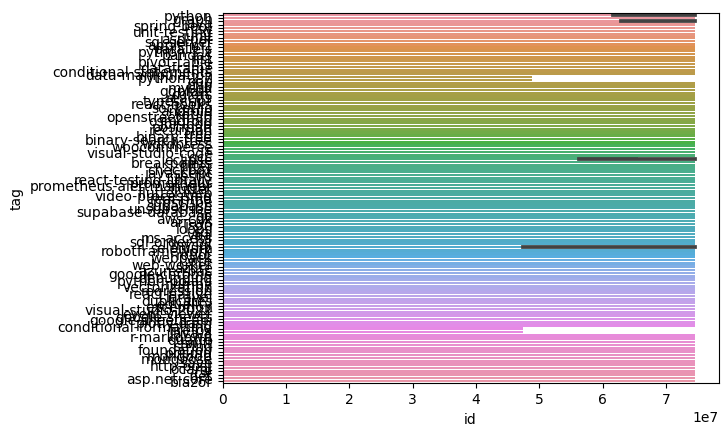

In [225]:
sns.barplot(data=tag_file, x="id", y="tag")

<AxesSubplot: xlabel='id', ylabel='count'>

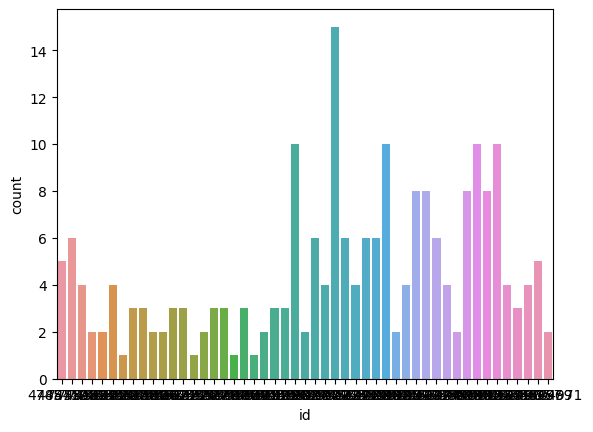

In [238]:

sns.countplot(x=tag_file["id"])

In [439]:
file.iloc[0].time

'2022-11-26 19:37:23Z'

In [442]:
file.iloc[0].time.split(' ')

['2022-11-26', '19:37:23Z']

In [447]:

from datetime import datetime

date_string = file.iloc[0].time.split(' ')[0]
print("date_string =", date_string)
print("type of date_string =", type(date_string))

date_object = datetime.strptime(date_string, "%Y-%m-%d")
print(date_object)



date_string = 2022-11-26
type of date_string = <class 'str'>
2022-11-26 00:00:00


In [450]:
file_extar = pd.read_csv('test_d.csv',index_col=0)

In [451]:
file_extar.head()

,Id,Title,Content,Tag,User,Vote,Answer,View,Time,Link
0,74593232,Could I do some maths in datetime python,I am using python for some project and I wante...,"['python', 'datetime', 'math']",zeyad,-1,0,4,2022-11-27 19:38:32Z,https://stackoverflow.com/questions/74593232/c...
1,74593230,Add Lines to multi donut graph in plotly,I have this code wich creates a png (first ima...,"['python', 'plotly']",Matias Ordoñez,0,0,2,2022-11-27 19:38:20Z,https://stackoverflow.com/questions/74593230/a...
2,74593229,Jinja Template contert string into dictionary,I have an string value stored in a variable an...,['jinja2'],Roberto Esparis,0,0,2,2022-11-27 19:38:14Z,https://stackoverflow.com/questions/74593229/j...
3,74593227,Why doesn't my program properly read from my t...,I made a text file with a list of usernames an...,"['python', 'database', 'tkinter', 'text-files'...",BluBalloon,0,0,5,2022-11-27 19:37:41Z,https://stackoverflow.com/questions/74593227/w...
4,74593226,How to create a report for a specific value of...,I'm new to SAS and need to produce a report fr...,"['sorting', 'variables', 'sas']",Expo2012,0,0,2,2022-11-27 19:37:41Z,https://stackoverflow.com/questions/74593226/h...


In [540]:
chec = file_extar.Id.tolist()
chec1 = file_extar.Tag


In [564]:
chec[0]

74593232

In [541]:
chec1[0].strip("[]").replace("'",'').split(',')

['python', ' datetime', ' math']

In [494]:
chec1

["['python', 'datetime', 'math']",
 "['python', 'plotly']",
 "['jinja2']",
 "['python', 'database', 'tkinter', 'text-files', 'txt']",
 "['sorting', 'variables', 'sas']",
 "['php']",
 "['javascript', 'html', 'canvas']",
 "['r', 'shinydashboard']",
 "['php', 'web', 'frontend', 'contacts']",
 "['c#', 'unity3d']",
 "['python']",
 "['android-studio', 'github']",
 "['macos', 'rust', 'posix', 'ipc']",
 "['jenkins', 'continuous-integration', 'bitbucket', 'jenkins-plugins', 'jira']",
 "['reactjs', 'next.js']",
 "['flutter', 'firebase', 'flutter-dependencies', 'analytics']",
 "['flutter', 'mobile', 'dart-isolates']",
 "['python', 'pandas', 'dataframe']",
 "['java', 'jpa', 'dao']",
 "['c#']",
 "['python']",
 "['html', 'css', 'flexbox']",
 "['reactjs', 'django', 'networking']",
 "['rust']",
 "['javascript', 'json', 'url', 'leaflet', 'geojson']",
 "['google-apps-script', 'google-sheets', 'spreadsheet', 'google-docs']",
 "['python', 'json', 'web-scraping']",
 "['html', 'css', 'angular', 'angular-mat

In [630]:
id_tag = []
tag = []
def findtag2():
    status = 0
    for d in chec1:

        a = d.strip("[]").replace("'",'').split(',')
        tag.extend(a)
        for i in range(len(a)):
            id_tag.append(chec[status])

        status += 1

        # if number != len(a):
        #     for x in 
        #     id_tag.append(chec[number])
        # else:
        #     pass


In [631]:
findtag2()


In [632]:
test1 = pd.DataFrame(list(zip(id_tag, tag)),columns =['id', 'tag'])

In [636]:
test1.to_csv('testd.csv')

In [634]:
test1.groupby(['tag'])['id'].count().sort_values(ascending=False).reset_index(name='count').head(10)

,tag,count
0,python,1300
1,javascript,830
2,java,468
3,c#,287
4,php,244
5,c++,226
6,reactjs,221
7,reactjs,194
8,html,191
9,r,191


In [639]:
for i in test1['tag'].unique():
    print(i)

python
 datetime
 math
 plotly
jinja2
 database
 tkinter
 text-files
 txt
sorting
 variables
 sas
php
javascript
 html
 canvas
r
 shinydashboard
 web
 frontend
 contacts
c#
 unity3d
android-studio
 github
macos
 rust
 posix
 ipc
jenkins
 continuous-integration
 bitbucket
 jenkins-plugins
 jira
reactjs
 next.js
flutter
 firebase
 flutter-dependencies
 analytics
 mobile
 dart-isolates
 pandas
 dataframe
java
 jpa
 dao
html
 css
 flexbox
 django
 networking
rust
 json
 url
 leaflet
 geojson
google-apps-script
 google-sheets
 spreadsheet
 google-docs
 web-scraping
 angular
 angular-material
spring
 spring-boot
 spring-security
 android
 charts
 c++
 c
pandas
 quantile
c++
 visual-studio-2019
 python-c-api
 rstudio
mesh
 arduino-esp8266
 ajax
 model-view-controller
react-native
 authentication
 oauth-2.0
 expo
angular
 javafx
 gridview
 fxml
 scenebuilder
 neo4j
mysql
 wordpress
 vagrant
 virtual-machine
 vagrantfile
 selenium
 auto
 mat-autocomplete
 http
firebase
 cloud-storage
 react-nat

In [643]:
test1['tag'] = test1['tag'].strip()

AttributeError: 'Series' object has no attribute 'strip'

In [648]:
def st(x):
    text = x
    text = text.strip()
    return text

In [656]:
test1['tag'] = test1['tag'].map(lambda x:st(x))

In [675]:
test

{'id': {2: {'tag': 10000}}}

In [724]:
file_extar

,Id,Title,Content,Tag,User,Vote,Answer,View,Time,Link
0,74593232,Could I do some maths in datetime python,I am using python for some project and I wante...,"['python', 'datetime', 'math']",zeyad,-1,0,4,2022-11-27 19:38:32Z,https://stackoverflow.com/questions/74593232/c...
1,74593230,Add Lines to multi donut graph in plotly,I have this code wich creates a png (first ima...,"['python', 'plotly']",Matias Ordoñez,0,0,2,2022-11-27 19:38:20Z,https://stackoverflow.com/questions/74593230/a...
2,74593229,Jinja Template contert string into dictionary,I have an string value stored in a variable an...,['jinja2'],Roberto Esparis,0,0,2,2022-11-27 19:38:14Z,https://stackoverflow.com/questions/74593229/j...
3,74593227,Why doesn't my program properly read from my t...,I made a text file with a list of usernames an...,"['python', 'database', 'tkinter', 'text-files'...",BluBalloon,0,0,5,2022-11-27 19:37:41Z,https://stackoverflow.com/questions/74593227/w...
4,74593226,How to create a report for a specific value of...,I'm new to SAS and need to produce a report fr...,"['sorting', 'variables', 'sas']",Expo2012,0,0,2,2022-11-27 19:37:41Z,https://stackoverflow.com/questions/74593226/h...
...,...,...,...,...,...,...,...,...,...,...
7495,74578188,Can't get rid of memory leak in c++,I'm trying to dynamically increase the capacit...,"['c++', 'memory-management', 'memory-leaks']",FieldyScop,0,1,83,2022-11-25 22:06:01Z,https://stackoverflow.com/questions/74578188/c...
7496,74578186,How Can I trigger a Click Event Inside a HTML5...,How do I attach event handlers to specific htm...,"['javascript', 'html', 'events', 'scope', 'cus...",Mark Tyers,0,0,10,2022-11-25 22:05:42Z,https://stackoverflow.com/questions/74578186/h...
7497,74578185,Suppress Mypy notes,"I'm getting a ton of ""notes"" from Mypy output ...","['python', 'mypy']",Garrett,0,0,16,2022-11-25 22:05:39Z,https://stackoverflow.com/questions/74578185/s...
7498,74578183,How can I add values to the begining and end o...,I have a .csv file that lists a couple thousan...,"['python', 'pandas']",dispatch,0,1,27,2022-11-25 22:05:17Z,https://stackoverflow.com/questions/74578183/h...


In [682]:
file_extar.Vote[file_extar.Vote == 0].count()

4930

In [661]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 4.6 MB/s eta 0:00:00


In [683]:
!pip install pillow

In [684]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [686]:
text = " ".join(cat for cat in file_extar.Title)

In [ ]:
from collections import Counter
word_could_dict=Counter(file_extar.)

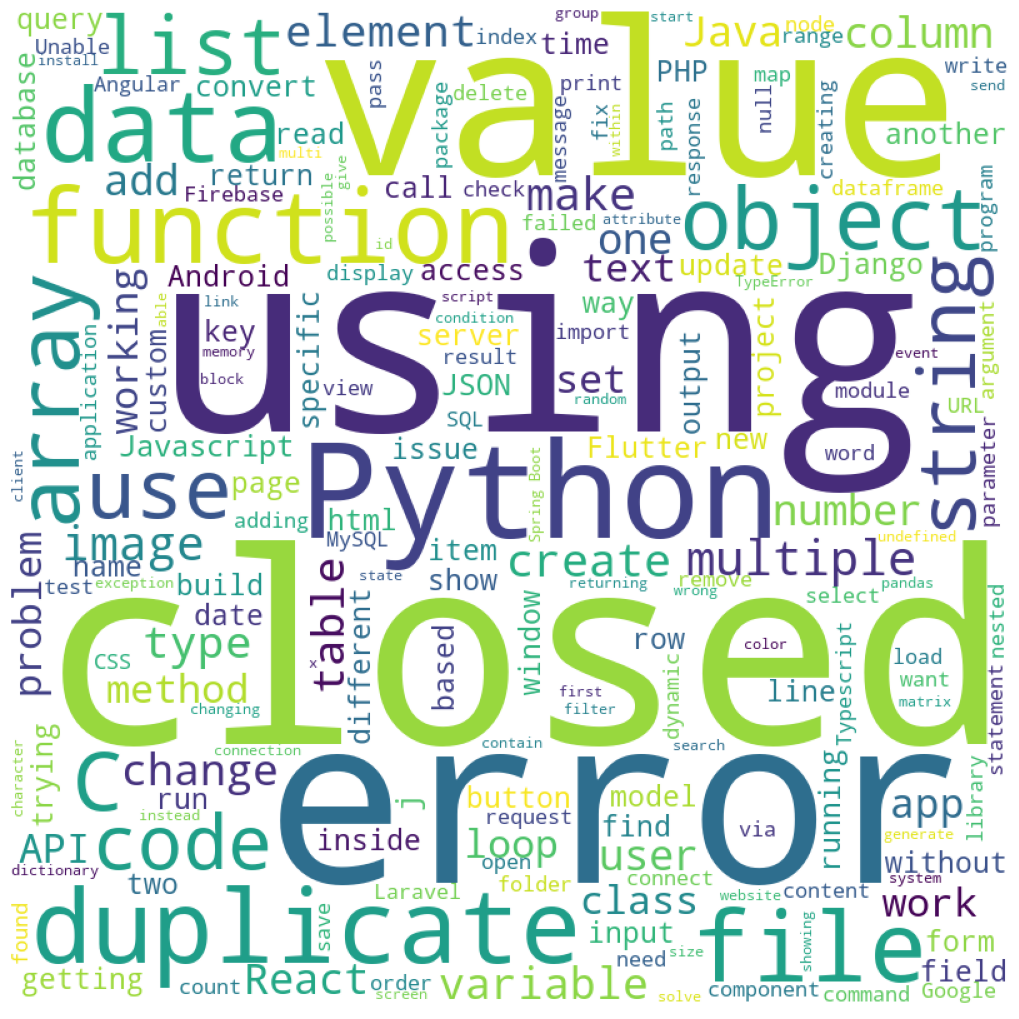

In [693]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(text)
 
# plot the WordCloud image
# 
#                       
print(wordcloud)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [695]:
!pip install multidict

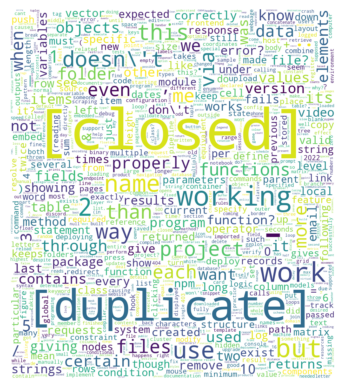

In [701]:
import multidict as multidict

import numpy as np

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict


def makeImage(text):
    alice_mask = np.array(Image.open("alice_mask.png"))

    wc = WordCloud(background_color="white", max_words=1000, mask=alice_mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = open(path.join(d, 'alice.txt'), encoding='utf-8')
text = text.read()
makeImage(getFrequencyDictForText(text))

In [703]:
# loading in all the essentials for data manipulation
import pandas as pd
import numpy as np
#load in the NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords
# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize
# Lemmatizer helps to reduce words to the base formfrom nltk.stem import WordNetLemmatizer
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams
# We can use counter to count the objects from collections
import Counter
# This is our visual library
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'nltk'

In [ ]:
def word_frequency(sentence):
# joins all the sentenses
    sentence ="".join(sentence)
    # creates tokens, creates lower class, removes numbers and lemmatizes the words
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words(‘english’)]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    #counts the words, pairs and trigrams
    counted = Counter(new_tokens)
    counted_2= Counter(ngrams(new_tokens,2))
    counted_3= Counter(ngrams(new_tokens,3))
    #creates 3 data frames and returns thems
    word_freq = pd.DataFrame(counted.items(),columns=[‘word’,’frequency’]).sort_values(by=’frequency’,ascending=False)
    word_pairs =pd.DataFrame(counted_2.items(),columns=[‘pairs’,’frequency’]).sort_values(by=’frequency’,ascending=False)
    trigrams =pd.DataFrame(counted_3.items(),columns=[‘trigrams’,’frequency’]).sort_values(by=’frequency’,ascending=False)
    return word_freq,word_pairs,trigrams

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement WordNetLemmatizer (from versions: none)
ERROR: No matching distribution found for WordNetLemmatizer


In [740]:
import pandas as pd
import numpy as np 
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [749]:
nltk.download()
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Note\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Note\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Note\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [751]:
comments =" ".join(file_extar['Title'])

comments1 = 'hello world'
words = word_tokenize(comments)

In [753]:
def clean_words(new_tokens):
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens

In [760]:
lowered = clean_words(words)

In [761]:
bow = Counter(lowered)
bow

Counter({'could': 41,
         'math': 4,
         'datetime': 9,
         'python': 433,
         'add': 149,
         'line': 97,
         'multi': 18,
         'donut': 1,
         'graph': 29,
         'plotly': 14,
         'jinja': 3,
         'template': 36,
         'contert': 1,
         'string': 215,
         'dictionary': 44,
         'program': 76,
         'properly': 35,
         'read': 93,
         'text': 142,
         'file': 447,
         'create': 185,
         'report': 12,
         'specific': 105,
         'value': 405,
         'variable': 179,
         'function': 377,
         'loop': 133,
         'record': 32,
         'xml': 23,
         'change': 177,
         'canvas': 15,
         'image': 199,
         'download': 25,
         'path': 56,
         'adding': 66,
         'shinydashboard': 1,
         'header': 25,
         'hide': 20,
         'toggle': 9,
         'button': 116,
         'necessary': 2,
         'host': 25,
         'database': 105,
  

In [785]:
aaa = 'asdfasdf'

In [786]:
tuple(aaa)

('a', 's', 'd', 'f', 'a', 's', 'd', 'f')

In [787]:
listc = []
for k,v in bow.items():
    listc.append(tuple((k,v)))

In [788]:
listc

[('could', 41),
 ('math', 4),
 ('datetime', 9),
 ('python', 433),
 ('add', 149),
 ('line', 97),
 ('multi', 18),
 ('donut', 1),
 ('graph', 29),
 ('plotly', 14),
 ('jinja', 3),
 ('template', 36),
 ('contert', 1),
 ('string', 215),
 ('dictionary', 44),
 ('program', 76),
 ('properly', 35),
 ('read', 93),
 ('text', 142),
 ('file', 447),
 ('create', 185),
 ('report', 12),
 ('specific', 105),
 ('value', 405),
 ('variable', 179),
 ('function', 377),
 ('loop', 133),
 ('record', 32),
 ('xml', 23),
 ('change', 177),
 ('canvas', 15),
 ('image', 199),
 ('download', 25),
 ('path', 56),
 ('adding', 66),
 ('shinydashboard', 1),
 ('header', 25),
 ('hide', 20),
 ('toggle', 9),
 ('button', 116),
 ('necessary', 2),
 ('host', 25),
 ('database', 105),
 ('php', 98),
 ('contact', 5),
 ('form', 97),
 ('best', 31),
 ('practice', 9),
 ('include', 18),
 ('within', 46),
 ('base', 12),
 ('class', 142),
 ('func', 2),
 ('return', 104),
 ('true', 15),
 ('run', 122),
 ('separate', 15),
 ('android', 125),
 ('studio', 61

In [789]:
xxxx = [
    ('could', 41),
    ('math', 4),
    ('datetime', 9),
    ('python', 433),
    ('add', 149),
    ('line', 97),
    ('multi', 18),
    ('donut', 1),
    ('graph', 29),
    ('plotly', 14),
    ('jinja', 3),
    ('template', 36),
    ('contert', 1),
    ('string', 215),
    ('dictionary', 44),
    ('program', 76),
    ('properly', 35),
    ('read', 93),
    ('text', 142),
    ('file', 447),
    ('create', 185),
    ('report', 12),
    ('specific', 105),
    ('value', 405),
    ('variable', 179),
    ('function', 377),
    ('loop', 133),
    ('record', 32),
    ('xml', 23),
    ('change', 177),
    ('canvas', 15),
    ('image', 199),
    ('download', 25),
    ('path', 56),
    ('adding', 66),
    ('shinydashboard', 1),
    ('header', 25),
    ('hide', 20),
    ('toggle', 9),
    ('button', 116),
    ('necessary', 2),
    ('host', 25),
    ('database', 105),
    ('php', 98),
    ('contact', 5),
    ('form', 97),
    ('best', 31),
    ('practice', 9),
    ('include', 18),
    ('within', 46),
    ('base', 12),
    ('class', 142),
    ('func', 2),
    ('return', 104),
    ('true', 15),
    ('run', 122),
    ('separate', 15),
    ('android', 125),
    ('studio', 61),
    ('two', 131),
    ('folder', 49),
    ('downloaded', 7),
    ('project', 80),
    ('memory', 47),
    ('allocated', 3),
    ('private', 9),
    ('even', 51),
    ('though', 17),
    ('mapped', 3),
    ('mmap', 4),
    ('jenkins', 18),
    ('bitbucket', 2),
    ('jira', 1),
    ('integration', 14),
    ('nextjs', 19),
    ('get', 289),
    ('object', 260),
    ('inject', 3),
    ('firebase', 76),
    ('instance', 36),
    ('isolate', 2),
    ('futurebuilder', 2),
    ('working', 142),
    ('flutter', 110),
    ('row', 107),
    ('indexing', 6),
    ('transaction', 7),
    ('across', 11),
    ('multiple', 214),
    ('daos', 1),
    ('jpa', 11),
    ('c', 180),
    ('recursive', 18),
    ('algorithm', 26),
    ('error', 533),
    ('using', 631),
    ('input', 139),
    ('trying', 87),
    ('make', 190),
    ('random', 38),
    ('number', 162),
    ('generator', 12),
    ('getting', 130),
    ('typeerror', 48),
    ('callable', 5),
    ('closed', 678),
    ('wrapping', 3),
    ('twice', 17),
    ('wrap', 4),
    ('ca', 128),
    ('back', 16),
    ('end', 30),
    ('data', 378),
    ('react', 191),
    ('app', 141),
    ('device', 32),
    ('macro', 10),
    ('generate', 39),
    ('struct', 22),
    ('parameter', 53),
    ('convert', 90),
    ('json', 101),
    ('geojson', 1),
    ('url', 68),
    ('endpoint', 13),
    ('table', 170),
    ('spreadsheet', 2),
    ('doc', 12),
    ('parsing', 13),
    ('changing', 46),
    ('border', 7),
    ('radius', 2),
    ('height', 17),
    ('mat', 4),
    ('select', 53),
    ('dropdown', 26),
    ('session', 16),
    ('timeout', 9),
    ('max', 15),
    ('per', 17),
    ('user', 170),
    ('spring', 69),
    ('boot', 45),
    ('application', 61),
    ('runtime', 15),
    ('google', 110),
    ('org', 3),
    ('chart', 28),
    ('java', 135),
    ('language', 31),
    ('help', 39),
    ('please', 28),
    ('task', 31),
    ('urgently', 1),
    ('correct', 25),
    ('way', 120),
    ('visualizing', 1),
    ('difference', 30),
    ('category', 9),
    ('median', 4),
    ('panda', 61),
    ('able', 42),
    ('import', 54),
    ('module', 76),
    ('api', 155),
    ('r', 83),
    ('sample', 14),
    ('seem', 11),
    ('painless', 1),
    ('mesh', 7),
    ('sometimes', 8),
    ('connect', 49),
    ('fetch', 32),
    ('ajax', 10),
    ('mvc', 12),
    ('expo', 10),
    ('refresh', 22),
    ('token', 45),
    ('custom', 80),
    ('validator', 1),
    ('cause', 15),
    ('lot', 5),
    ('break', 12),
    ('load', 55),
    ('node', 63),
    ('javafx', 8),
    ('update', 96),
    ('property', 71),
    ('javascript', 122),
    ('stop', 32),
    ('existing', 15),
    ('something', 11),
    ('happens', 9),
    ('duplicate', 382),
    ('vagrant', 1),
    ('wordpress', 37),
    ('vm', 9),
    ('db', 22),
    ('one', 151),
    ('retrieving', 6),
    ('match', 42),
    ('list', 240),
    ('disable', 19),
    ('autocomplete', 2),
    ('empty', 25),
    ('angular', 62),
    ('html', 81),
    ('content', 56),
    ('fully', 11),
    ('loaded', 9),
    ('page', 109),
    ('cloud', 30),
    ('storage', 21),
    ('local', 33),
    ('http', 40),
    ('request', 81),
    ('sending', 19),
    ('axios', 22),
    ('native', 47),
    ('method', 135),
    ('decorator', 3),
    ('setting', 23),
    ('csrf', 4),
    ('browser', 37),
    ('cooky', 7),
    ('tab', 12),
    ('inherit', 6),
    ('structs', 3),
    ('removing', 7),
    ('inside', 109),
    ('array', 291),
    ('center', 13),
    ('drawn', 3),
    ('problem', 132),
    ('decrypt', 3),
    ('code', 245),
    ('wrong', 45),
    ('key', 109),
    ('plotlyjs', 1),
    ('recreate', 2),
    ('shiny', 6),
    ('svg', 16),
    ('shape', 18),
    ('invert', 2),
    ('whats', 4),
    ('behind', 6),
    ('shopify', 3),
    ('blog', 5),
    ('bias', 1),
    ('preferential', 1),
    ('attachment', 1),
    ('network', 37),
    ('netlogo', 1),
    ('sql', 80),
    ('join', 27),
    ('appropriately', 1),
    ('sum', 37),
    ('mongo', 4),
    ('already', 24),
    ('findone', 1),
    ('giving', 25),
    ('wired', 2),
    ('result', 72),
    ('top', 23),
    ('ranking', 1),
    ('different', 110),
    ('place', 16),
    ('design', 12),
    ('swiftui', 36),
    ('hello', 5),
    ('know', 34),
    ('solve', 38),
    ('jetpack', 16),
    ('compose', 21),
    ('grid', 26),
    ('adaptive', 3),
    ('column', 178),
    ('based', 98),
    ('size', 37),
    ('j', 90),
    ('stack', 30),
    ('underflow', 1),
    ('pic', 1),
    ('assembly', 15),
    ('precise', 1),
    ('geometric', 4),
    ('extent', 1),
    ('ciimage', 1),
    ('video', 35),
    ('player', 9),
    ('progress', 8),
    ('bar', 33),
    ('behaves', 1),
    ('strange', 10),
    ('average', 16),
    ('trained', 3),
    ('model', 74),
    ('find', 104),
    ('city', 4),
    ('smallest', 5),
    ('neighbor', 2),
    ('threshold', 2),
    ('distance', 8),
    ('golang', 17),
    ('want', 69),
    ('certain', 33),
    ('information', 18),
    ('box', 24),
    ('winfroms', 1),
    ('choose', 7),
    ('knock', 1),
    ('dice', 1),
    ('game', 27),
    ('mongodb', 35),
    ('pymongo', 2),
    ('exists', 9),
    ('id', 38),
    ('drf', 5),
    ('try', 26),
    ('used', 33),
    ('nested', 50),
    ('serializer', 2),
    ('new', 89),
    ('nativeeventemitter', 2),
    ('building', 25),
    ('xcode', 16),
    ('many', 28),
    ('sha', 2),
    ('docker', 54),
    ('proper', 7),
    ('reuse', 4),
    ('doctrine', 3),
    ('dql', 2),
    ('prevent', 25),
    ('positional', 5),
    ('index', 46),
    ('xxx', 2),
    ('bound', 8),
    ('azure', 44),
    ('sdk', 11),
    ('use', 234),
    ('proxyoptions', 1),
    ('proxy', 15),
    ('pas', 55),
    ('required', 13),
    ('httpclient', 3),
    ('along', 4),
    ('hostname', 4),
    ('setup', 14),
    ('neuron', 1),
    ('perceptron', 2),
    ('chages', 1),
    ('question', 27),
    ('handle', 19),
    ('keypressed', 1),
    ('joomla', 1),
    ('timestring', 1),
    ('passed', 12),
    ('output', 88),
    ('call', 94),
    ('simplescalar', 1),
    ('cygwin', 2),
    ('deserialize', 4),
    ('correctly', 24),
    ('synchronized', 1),
    ('applied', 8),
    ('instead', 44),
    ('whole', 7),
    ('infinite', 10),
    ('bug', 6),
    ('laravel', 60),
    ('resource', 18),
    ('moving', 11),
    ('excluded', 1),
    ('arch', 3),
    ('individual', 5),
    ('package', 52),
    ('copy', 27),
    ('conditional', 15),
    ('formatting', 5),
    ('wise', 2),
    ('build', 91),
    ('unpack', 1),
    ('nonetype', 1),
    ('ga', 1),
    ('optimization', 3),
    ('set', 124),
    ('starting', 18),
    ('script', 74),
    ('another', 94),
    ('crash', 13),
    ('need', 70),
    ('message', 65),
    ('font', 18),
    ('openlayers', 2),
    ('feature', 19),
    ('style', 25),
    ('v', 49),
    ('layer', 17),
    ('stoping', 1),
    ('migrate', 3),
    ('live', 11),
    ('site', 22),
    ('machine', 22),
    ('diferent', 2),
    ('version', 40),
    ('element', 176),
    ('located', 3),
    ('selenium', 41),
    ('show', 87),
    ('awesome', 1),
    ('icon', 20),
    ('caused', 6),
    ('proxyerror', 1),
    ('remotedisconnected', 1),
    ('connection', 45),
    ('without', 99),
    ('response', 55),
    ('htaccess', 5),
    ('rewrite', 5),
    ('rule', 14),
    ('subdomain', 2),
    ('subfolder', 5),
    ('automapper', 4),
    ('mapping', 8),
    ('relationship', 19),
    ('constant', 8),
    ('char', 16),
    ('genius', 1),
    ('lyric', 1),
    ('opera', 1),
    ('extension', 24),
    ('scatterplot', 1),
    ('take', 37),
    ('argument', 62),
    ('given', 31),
    ('beginning', 4),
    ('running', 87),
    ('window', 112),
    ('making', 19),
    ('chat', 7),
    ('parser', 4),
    ('gui', 19),
    ('tkinter', 28),
    ('cant', 22),
    ('write', 50),
    ('overwriting', 2),
    ('rechart', 1),
    ('color', 45),
    ('opacity', 4),
    ('filter', 47),
    ('checkbox', 5),
    ('unexpected', 23),
    ('none', 15),
    ('domain', 17),
    ('name', 98),
    ('server', 141),
    ('deal', 6),
    ('joining', 2),
    ('child', 33),
    ('static', 22),
    ('linking', 6),
    ('clang', 4),
    ('libunwind', 1),
    ('cs', 53),
    ('quotation', 2),
    ('mark', 10),
    ('start', 43),
    ('byte', 16),
    ('unable', 73),
    ('pdf', 30),
    ('drive', 15),
    ('type', 175),
    ('side', 16),
    ('nav', 4),
    ('web', 49),
    ('subversion', 1),
    ('command', 63),
    ('client', 43),
    ('svn', 1),
    ('reference', 37),
    ('collection', 24),
    ('bingo', 1),
    ('specified', 12),
    ('writing', 13),
    ('dash', 8),
    ('clientside', 1),
    ('callback', 13),
    ('jupyter', 13),
    ('notebook', 12),
    ('pycharm', 10),
    ('calculating', 4),
    ('share', 8),
    ('price', 14),
    ('internal', 20),
    ('creation', 8),
    ('wizard', 2),
    ('remove', 65),
    ('symlink', 2),
    ('define', 17),
    ('simulating', 1),
    ('queue', 10),
    ('consumer', 8),
    ('tray', 2),
    ('restaurant', 3),
    ('koltin', 1),
    ('low', 8),
    ('quality', 3),
    ('registerforactivityresult', 1),
    ('penetration', 1),
    ('alert', 12),
    ('linux', 38),
    ('ubuntu', 19),
    ('binding', 11),
    ('iptyhon', 1),
    ('producing', 2),
    ('probability', 4),
    ('win', 4),
    ('crap', 1),
    ('downloading', 7),
    ('external', 25),
    ('iteration', 6),
    ('dynamically', 32),
    ('pathstring', 1),
    ('suddenly', 3),
    ('send', 39),
    ('email', 26),
    ('broker', 3),
    ('card', 8),
    ('dockerized', 1),
    ('gcp', 10),
    ('emulator', 10),
    ('bucket', 7),
    ('balancer', 3),
    ('helm', 2),
    ('terraform', 14),
    ('jump', 4),
    ('move', 27),
    ('depends', 1),
    ('uninitialized', 1),
    ('access', 86),
    ('stripe', 11),
    ('paymentintent', 3),
    ('aws', 39),
    ('sqs', 1),
    ('lambda', 24),
    ('postasync', 1),
    ('idle', 2),
    ('exactly', 12),
    ('mean', 23),
    ('sign', 10),
    ('open', 48),
    ('toast', 4),
    ('intent', 4),
    ('launch', 6),
    ('unescaped', 1),
    ('contains', 28),
    ('tag', 34),
    ('structure', 24),
    ('develop', 5),
    ('fabric', 3),
    ('mod', 2),
    ('listview', 10),
    ('showing', 43),
    ('thread', 29),
    ('exit', 12),
    ('early', 5),
    ('hbox', 1),
    ('clicking', 12),
    ('display', 72),
    ('vbox', 1),
    ('incorrect', 12),
    ('direction', 5),
    ('apperate', 1),
    ('workspace', 4),
    ('iex', 1),
    ('character', 52),
    ('position', 37),
    ('fixed', 6),
    ('width', 21),
    ('dropped', 2),
    ('item', 77),
    ('rendering', 24),
    ('mcp', 1),
    ('minecraft', 1),
    ('django', 93),
    ('built', 7),
    ('password', 33),
    ('reset', 13),
    ('split', 19),
    ('vertical', 3),
    ('range', 48),
    ('widget', 22),
    ('displaying', 18),
    ('availability', 3),
    ('throughout', 1),
    ('day', 13),
    ('piece', 3),
    ('jvm', 4),
    ('instruction', 6),
    ('swap', 7),
    ('aaa', 1),
    ('automation', 4),
    ('test', 77),
    ('failed', 64),
    ('express', 16),
    ('vps', 3),
    ('go', 23),
    ('compile', 14),
    ('got', 19),
    ('issue', 88),
    ('append', 13),
    ('attribute', 45),
    ('auth', 12),
    ('pervent', 1),
    ('swagger', 3),
    ('generating', 11),
    ('responseentity', 1),
    ('real', 10),
    ('single', 31),
    ('entity', 27),
    ('link', 43),
    ('together', 9),
    ('haskell', 9),
    ('lazyness', 1),
    ('evaluation', 2),
    ('order', 54),
    ('pattern', 24),
    ('matching', 15),
    ('mappedby', 1),
    ('unknown', 17),
    ('target', 17),
    ('default', 24),
    ('length', 17),
    ('io', 31),
    ('reliably', 1),
    ('pinia', 1),
    ('state', 51),
    ('component', 85),
    ('macos', 26),
    ('ventura', 6),
    ('save', 50),
    ('framework', 23),
    ('scala', 8),
    ('spark', 11),
    ('extract', 30),
    ('logic', 16),
    ('aggregation', 6),
    ('collision', 6),
    ('detector', 2),
    ('circle', 11),
    ('next', 23),
    ('serve', 2),
    ('statically', 1),
    ('regular', 10),
    ('expression', 21),
    ('exchange', 3),
    ('gal', 1),
    ('field', 84),
    ('insert', 40),
    ('mysql', 68),
    ('pipeline', 13),
    ('hi', 8),
    ('locate', 5),
    ('chromedriver', 2),
    ('thanks', 2),
    ('advance', 3),
    ('semantic', 2),
    ('ui', 26),
    ('horizontal', 7),
    ('menu', 25),
    ('overflowing', 1),
    ('testlink', 1),
    ('installation', 12),
    ('performance', 18),
    ('readability', 4),
    ('level', 20),
    ('library', 62),
    ('supportwalletfragment', 2),
    ('xamarin', 9),
    ('keyframe', 2),
    ('fill', 10),
    ('safari', 5),
    ('train', 5),
    ('simpy', 2),
    ('simulation', 8),
    ('rllib', 2),
    ('full', 19),
    ('extend', 7),
    ('vector', 24),
    ('rust', 22),
    ('caesar', 1),
    ('cipher', 3),
    ('markdownit', 1),
    ('deploying', 11),
    ('kubernetes', 8),
    ('pod', 8),
    ('gave', 2),
    ('implement', 33),
    ('socket', 19),
    ('connects', 2),
    ('always', 24),
    ('till', 2),
    ('close', 14),
    ('basis', 2),
    ('calculate', 30),
    ('executed', 6),
    ('libreoffice', 2),
    ('virtual', 13),
    ('environment', 12),
    ('relative', 10),
    ('scaled', 1),
    ('dragged', 1),
    ('around', 10),
    ('solving', 4),
    ('plotting', 10),
    ('render', 16),
    ('artifact', 4),
    ('mac', 16),
    ('outlinepass', 1),
    ('redirect', 26),
    ('login', 29),
    ('nvim', 1),
    ('overriding', 3),
    ('ftplugin', 1),
    ('neovim', 4),
    ('capacity', 1),
    ('rebalance', 1),
    ('spot', 4),
    ('paper', 3),
    ('introduced', 2),
    ('kernel', 12),
    ('convolutional', 3),
    ('neural', 9),
    ('bot', 36),
    ('work', 137),
    ('russian', 1),
    ('ukranian', 1),
    ('increase', 9),
    ('incremental', 3),
    ('rendered', 4),
    ('although', 5),
    ('come', 9),
    ('right', 34),
    ('specify', 12),
    ('github', 33),
    ('action', 28),
    ('fatal', 6),
    ('goroutines', 1),
    ('asleep', 1),
    ('deadlock', 2),
    ('reading', 33),
    ('vectorized', 1),
    ('frame', 19),
    ('picker', 2),
    ('heroku', 10),
    ('push', 17),
    ('parse', 23),
    ('procfile', 2),
    ('tried', 5),
    ('suggested', 2),
    ('solution', 13),
    ('mysqli', 4),
    ('query', 110),
    ('oops', 1),
    ('sort', 31),
    ('min', 7),
    ('put', 23),
    ('dataframe', 69),
    ('missing', 33),
    ('debian', 6),
    ('purpose', 5),
    ('documentation', 8),
    ('sorted', 6),
    ('expected', 28),
    ('found', 53),
    ('int', 19),
    ('graphql', 13),
    ('testing', 19),
    ('float', 20),
    ('statement', 46),
    ('ada', 1),
    ('various', 2),
    ('csv', 39),
    ('force', 5),
    ('route', 31),
    ('wait', 12),
    ('finish', 4),
    ('uploading', 10),
    ('click', 47),
    ('listener', 8),
    ('uncaught', 19),
    ('null', 56),
    ('iterable', 5),
    ('symbol', 17),
    ('mock', 7),
    ('dependency', 31),
    ('abstract', 4),
    ('shortcut', 3),
    ('desktop', 10),
    ('give', 49),
    ('mail', 5),
    ('pimcore', 1),
    ('symfony', 5),
    ('amlalinux', 1),
    ('hosting', 8),
    ('website', 47),
    ('cloudflare', 5),
    ('store', 34),
    ('received', 10),
    ('prop', 12),
    ('encoding', 9),
    ('learning', 12),
    ('mariadb', 10),
    ('scrollbar', 2),
    ('vuetify', 4),
    ('customize', 3),
    ('hotspot', 1),
    ('ssid', 1),
    ('stuck', 13),
    ('wificonfiguration', 1),
    ('among', 4),
    ('dont', 10),
    ('receiving', 6),
    ('integrating', 2),
    ('blazor', 12),
    ('keycloak', 4),
    ('photo', 9),
    ('incorrectly', 4),
    ('containing', 22),
    ('facing', 4),
    ('installtion', 1),
    ('gfortran', 1),
    ('compiler', 12),
    ('slot', 4),
    ('outlook', 5),
    ('sub', 10),
    ('calendar', 12),
    ('attached', 2),
    ('connecting', 17),
    ('inconsistent', 3),
    ('passing', 28),
    ('blocked', 5),
    ('understanding', 6),
    ('book', 6),
    ('example', 10),
    ('updating', 30),
    ('cell', 26),
    ('datasets', 4),
    ('onclick', 9),
    ('localstorage', 5),
    ('dataset', 20),
    ('intention', 1),
    ('persistence', 3),
    ('red', 5),
    ('const', 5),
    ('returning', 49),
    ('anything', 8),
    ('junit', 7),
    ('generated', 19),
    ('authentication', 20),
    ('service', 33),
    ('invalid', 34),
    ('group', 41),
    ('accessing', 15),
    ('pyspark', 15),
    ('univariatefeatureselector', 1),
    ('every', 43),
    ('nth', 2),
    ('oracle', 13),
    ('instant', 1),
    ('parallel', 6),
    ('bypass', 4),
    ('recent', 6),
    ('telegram', 15),
    ('limitation', 4),
    ('discord', 22),
    ('long', 19),
    ('indicate', 2),
    ('updated', 14),
    ('equation', 7),
    ('expand', 7),
    ('increasing', 4),
    ('numeric', 10),
    ('consecutively', 1),
    ('terminal', 19),
    ('block', 39),
    ('routing', 11),
    ('codegniter', 1),
    ('current', 26),
    ('admin', 9),
    ('security', 10),
    ('manager', 11),
    ('exception', 41),
    ('creating', 68),
    ('schedule', 6),
    ('notification', 11),
    ('kotlin', 24),
    ('volle', 1),
    ('decompile', 3),
    ('apk', 5),
    ('trouble', 12),
    ('importing', 14),
    ('flask', 23),
    ('dance', 1),
    ('subdomains', 1),
    ('expire', 2),
    ('short', 2),
    ('time', 119),
    ('exe', 6),
    ('made', 14),
    ('pyinstaller', 6),
    ('assign', 11),
    ('dask', 3),
    ('captcha', 1),
    ('separately', 4),
    ('nfv', 1),
    ('vanet', 1),
    ('protocol', 8),
    ('trim', 3),
    ('fetched', 4),
    ('designer', 3),
    ('everything', 4),
    ('manually', 11),
    ('helped', 1),
    ('tool', 11),
    ('construction', 1),
    ('async', 21),
    ('wont', 7),
    ('construct', 5),
    ('void', 6),
    ('become', 3),
    ('resolve', 28),
    ('configuration', 15),
    ('debugruntimeclasspath', 2),
    ('dolphin', 1),
    ('determine', 9),
    ('msvc', 2),
    ('gcc', 6),
    ('intel', 4),
    ('processor', 2),
    ('redux', 16),
    ('ssr', 2),
    ('loading', 22),
    ('mobile', 13),
    ('drupal', 1),
    ('tailwind', 7),
    ('visual', 31),
    ('assigning', 10),
    ('high', 11),
    ('polymorphism', 1),
    ('processing', 9),
    ('sagemaker', 7),
    ('dropping', 1),
    ('generalization', 1),
    ('step', 11),
    ('wpf', 9),
    ('bootstrap', 26),
    ('theme', 9),
    ('internet', 8),
    ('grouping', 7),
    ('latest', 9),
    ('article', 3),
    ('computing', 1),
    ('loss', 9),
    ('cucumber', 2),
    ('scenario', 4),
    ('main', 22),
    ('pil', 2),
    ('pillow', 1),
    ('console', 29),
    ('wifi', 3),
    ('centos', 1),
    ('case', 21),
    ('genetic', 3),
    ('taking', 10),
    ('converge', 1),
    ('organize', 4),
    ('selectizeinput', 2),
    ('dependecies', 2),
    ('reverse', 9),
    ('edit', 15),
    ('option', 29),
    ('phonebook', 1),
    ('shell', 15),
    ('big', 9),
    ('pixel', 9),
    ('small', 12),
    ('tile', 1),
    ('infer', 2),
    ('schema', 7),
    ('several', 14),
    ('zip', 7),
    ('synchronizing', 1),
    ('listwheelscrollview', 1),
    ('view', 47),
    ('upload', 29),
    ('look', 5),
    ('ad', 10),
    ('core', 35),
]


In [791]:
data = pd.DataFrame(xxxx,columns=['word','frequency']).sort_values(by='frequency',ascending=False)

In [797]:
data.frequency.tolist()

[678,
 631,
 533,
 447,
 433,
 405,
 382,
 378,
 377,
 291,
 289,
 260,
 245,
 240,
 234,
 215,
 214,
 199,
 191,
 190]

In [792]:
data =data.head(20)

<AxesSubplot: xlabel='frequency', ylabel='word'>

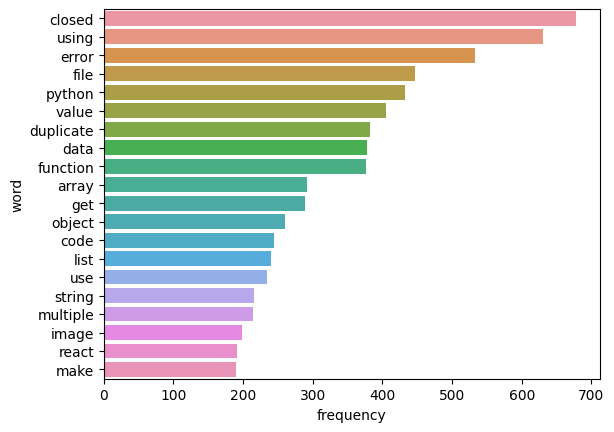

In [793]:
sns.barplot(x='frequency',y='word',data=data)